### W kodzie przejdę przez najciekawsze i najczęściej pojawiające się metody formatowania z Excela, które można zaprząc w Pythonie. Oczywiście nie wszystko da się przenieść 1:1 ale od czegoś trzeba zacząć

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(0,100,size=(10, 4)), columns=list('ABCD'))


In [2]:
df.at[3,'A'] = np.NaN
df.at[6,'B'] = np.NaN
df.at[7,'C'] = np.NaN
df.at[9,'D'] = np.NaN


In [3]:
df

,A,B,C,D
0,75.0,24.0,23.0,23.0
1,84.0,8.0,9.0,43.0
2,5.0,72.0,1.0,17.0
3,NaN,83.0,49.0,65.0
4,58.0,97.0,61.0,69.0
5,83.0,71.0,66.0,36.0
6,96.0,NaN,96.0,68.0
7,70.0,68.0,NaN,51.0
8,73.0,85.0,61.0,87.0
9,56.0,96.0,84.0,NaN


### Podświetlenie brkujących wartości 

In [10]:
df_styled = df.style.highlight_null()
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


Będę zapisywał tabele w plikach płaskich korzystając z pakietu _dataframe_image_ https://pypi.org/project/dataframe-image/ <br>
pip install dataframe_image <br>
conda install -c conda-forge dataframe_image


In [29]:
import dataframe_image as dfi
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_null.png') # nazwa pliku nie moze zaczynać się od liczby
dfi.export(df, 'E:\page_ds\conditional_formating\pict\main_df.png')

Domyślnym kolorem podświetlenia jest czerewony oraz jak widać, tabels zachowuje naprzemienne formatowanie wierszy biały-szary. Można to zmienić porzez dodanie argumentu _props_

In [13]:
df_styled = df.style.highlight_null(props='color:white;background-color:blue')
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_null_blue.png')
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


Możemy również zdefiniować kolumny dla których chcemy wykonać formatowanie warunkowe poprzez wykorzystanie argumentu _subset_

In [28]:
df_styled = df.style.highlight_null(subset=['B','C'])
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_null_subset.png')
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


Możemy podświetlić wartości ekstremalne tj. __minumum__ i __maksimum__. Domyślnie zrobimy to per kolumna ale dodając argument axis=1 zmieniamy działanie funkcji na per wiersz

In [24]:
df_styled = df.style.highlight_max(props='color:white;background-color:green')
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_max_col.png')
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


In [25]:
df_styled = df.style.highlight_max(props='color:white;background-color:green', axis = 1)
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_max_row.png')
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


Podświetlanie wartości z zadanego przedziału. Zdefiniowane zakresy oznaczają __przedział domknięty__. 


In [26]:
df_styled = df.style.highlight_between(left = 8, right=17, props='color:white;background-color:blue')
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_range.png') 
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


Formatowanie za pomocą słupków wartości

In [30]:
df_styled = df.style.bar()
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_bar.png') 
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


I jeszcze w bardziej spersonalizowanej formie

In [41]:
df_styled = df.style.bar(color='lightgreen', height= 70, width=60)
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_bar_custom.png') 
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


I na koniec najbarziej powszechny rodzaj formatowania czyli __gradientowe__. W tym wypadku dodałem również dla jednej kolumny wymazanie wartości nullowej, które ma domyślne formatowanie na czarno. W kodzie widać również jak można łączyć kilka stylów formatowania

In [56]:
df_styled = df.style.background_gradient(cmap='RdYlGn', subset='A')\
.highlight_null(props='color:white; background-color:white')\
.background_gradient(cmap='RdYlGn', subset='B')
dfi.export(df_styled, 'E:\page_ds\conditional_formating\pict\highlight_gradient.png') 
df_styled

,A,B,C,D
0,75.000000,24.000000,23.000000,23.000000
1,84.000000,8.000000,9.000000,43.000000
2,5.000000,72.000000,1.000000,17.000000
3,nan,83.000000,49.000000,65.000000
4,58.000000,97.000000,61.000000,69.000000
5,83.000000,71.000000,66.000000,36.000000
6,96.000000,nan,96.000000,68.000000
7,70.000000,68.000000,nan,51.000000
8,73.000000,85.000000,61.000000,87.000000
9,56.000000,96.000000,84.000000,nan


## Formatowanie wykresów 

W pierwszej kolejności spróbujemy wyróżnić na wykresie słupkowym jeden z nich. W tym wypadku zrobiłem to ręcznie ale mamy tutaj oczywiście wszelkiego rodzaju możliwości stworzenia list za pomocą wyrażeń logicznych itp. , które umożliwią szerszy wybór kolumn bez potrzeby ręcznego ich wypisywania (np. gdy słupek jest większy od jakieś wartości lub co drugi).

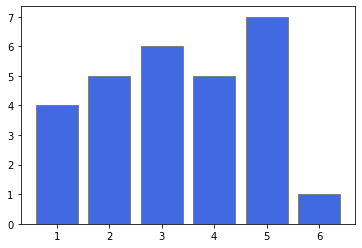

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#przykładowy zbiór 
df = pd.DataFrame({'A':[1,2,3,4,5,6], 'B':[4,5,6,5,7,1], 'C':[-3,-4,-5,-7,-6,-1]})

#Basic bar plot:
fig, ax = plt.subplots()
ax.bar(df.A, df.B, color='royalblue', edgecolor='gray', linewidth=1) 
plt.savefig(r'E:\page_ds\conditional_formating\pict\bar_plot.png', format='png',dpi=300)
plt.show()

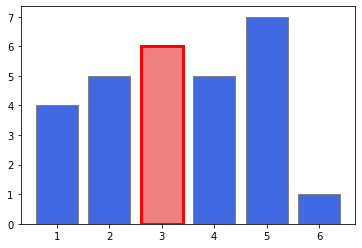

In [69]:
fig, ax = plt.subplots()
ax.bar(df.A, df.B,  
       color=['royalblue', 'royalblue', 'lightcoral', 'royalblue', 'royalblue'], 
       edgecolor=['gray', 'gray', 'red', 'gray', 'gray', 'gray'],
       linewidth=[1, 1, 3, 1, 1, 1]) 
plt.savefig(r'E:\page_ds\conditional_formating\pict\indicate_bar.png', format='png',dpi=300)
plt.show()

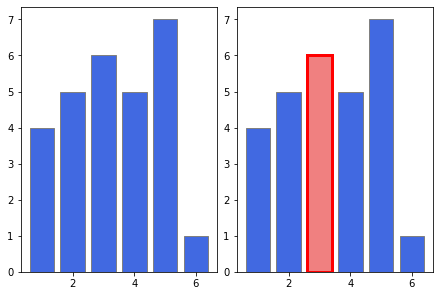

In [77]:
df = pd.DataFrame({'A':[1,2,3,4,5,6], 'B':[4,5,6,5,7,1], 'C':[-3,-4,-5,-7,-6,-1]})

#Można też za jednym zamachem
fig, ax = plt.subplots(1,2,squeeze=False, constrained_layout=True)
ax[0,0].bar(df.A, df.B, color='royalblue', edgecolor='gray', linewidth=1) 
ax[0,1].bar(df.A, df.B,  
       color=['royalblue', 'royalblue', 'lightcoral', 'royalblue', 'royalblue'], 
       edgecolor=['gray', 'gray', 'red', 'gray', 'gray', 'gray'],
       linewidth=[1, 1, 3, 1, 1, 1]) 
plt.show()

Dodanie dodatkowej osi

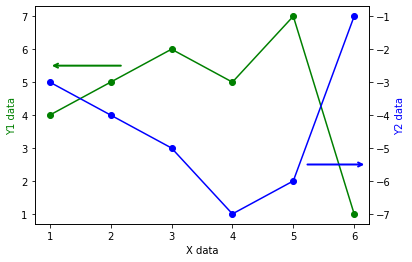

In [78]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.A, df.B, 'green', marker='o')
ax2.plot(df.A, df.C, 'blue', marker='o')

#ustalamy nazwy osi
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')

# wskaźniki dla upiększenia (więcej o adnotacjach w dokumentacji pakietu https://matplotlib.org/stable/gallery/#embedding-matplotlib-in-graphical-user-interfaces)
ax1.annotate('', xy=(1,5.5), xytext=(2.2,5.5), arrowprops=dict(arrowstyle='->', linewidth=2, color='green'))
ax2.annotate('', xy=(6.2,-5.5), xytext=(5.2,-5.5), arrowprops=dict(arrowstyle='->', linewidth=2, color='blue'))
plt.savefig(r'E:\page_ds\conditional_formating\pict\additional_axis.png', format='png',dpi=300)
plt.show()

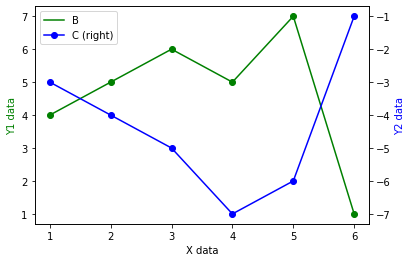

In [64]:
#można też poprzez dodanie argumentu secondary_y=True
ax = df.plot(x='A', y='B', color='green', style='-o')
ax2 = df.plot(x='A', y='C', secondary_y=True,color='blue', style='-o', ax=ax)

ax.set_xlabel('X data')
ax.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')

plt.show()

I na zakończenie dwa wykresy z wypełnieniem, na wpółprzezroczyste. 

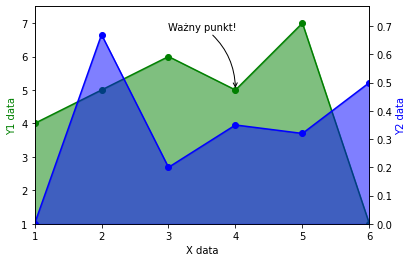

In [79]:
df = pd.DataFrame({'A':[1,2,3,4,5,6], 'B':[4,5,6,5,7,1], 'C':[0,.67,.2,.35,.32,.5]})

fig, ax1 = plt.subplots()

# ustawiamy objekt axis
ax2 = ax1.twinx()
ax1.plot(df.A, df.B, 'green', marker='o')
ax2.plot(df.A, df.C, 'blue', marker='o')

# dodajemy wypełnienie z półprzezroczystąścią (parametr alpha)
ax1.fill_between(df.A, 0, df.B, color='green', alpha=0.5) 
ax2.fill_between(df.A, 0, df.C, color='blue', alpha=0.5) 

#dodajemy adnotację
ax1.annotate('Ważny punkt!', xy=(4,5), xytext=(3,6.8), arrowprops=dict(arrowstyle='->', linewidth=1, connectionstyle='arc3, rad=-0.25'))

# dodajemy opis osi oraz ustalamy limity
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='green')
ax2.set_ylabel('Y2 data', color='blue')
ax1.axis([df.A.min(), df.A.max(), df.B.min(), df.B.max()+0.5])
ax2.axis([df.A.min(), df.A.max(), df.C.min(), df.C.max()+.1])
plt.savefig(r'E:\page_ds\conditional_formating\pict\alpha_chart.png', format='png',dpi=300)
plt.show()